In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
from sklearn.inspection import plot_partial_dependence

In [2]:
data=pd.read_csv('data_hybrid_descriptors.csv')
data.head()

,Name,id,HOMO,LUMO,E_S1,f_S1,E_T1,dEST,RDKit_0,RDKit_1,RDKit_2,RDKit_3,RDKit_4,RDKit_5,RDKit_6,RDKit_7,Yield_2h,Yield_12h,Class
0,4CzIPN,3a,-0.20639,-0.08880,3.2630,0.1845,3.0330,0.2300,5.026309,2.302462,-4.098158,2.645094,2.165571,0.810414,-1.836163,1.698044,56,87,good
1,4tBuCzIPN,3b,-0.19621,-0.08203,3.1893,0.1220,2.9803,0.2090,14.340615,-3.190789,-6.166707,-2.363734,-4.922239,3.059227,3.411225,0.540899,49,84,good
2,4MeCzIPN,3c,-0.19686,-0.08286,3.1738,0.1882,2.9538,0.2200,7.739330,1.067291,-4.527043,1.044420,0.473656,1.435541,-0.471302,1.292435,45,86,good
3,4BrCzIPN,3d,-0.22360,-0.11433,3.1934,0.1257,3.0271,0.1663,9.297674,1.498317,-0.902181,2.604148,5.683587,2.231169,5.946085,-0.294566,83,88,very_good
4,4OMeCzIPN,3e,-0.18540,-0.07855,3.0450,0.1673,2.8555,0.1895,11.557462,16.313292,4.146564,-3.224873,-5.143811,-1.953017,-0.614755,-0.966040,0,78,bad


In [3]:
X = data.drop(columns=['Name', 'id', 'Yield_2h', 'Yield_12h', 'Class'])
X.head()

,HOMO,LUMO,E_S1,f_S1,E_T1,dEST,RDKit_0,RDKit_1,RDKit_2,RDKit_3,RDKit_4,RDKit_5,RDKit_6,RDKit_7
0,-0.20639,-0.08880,3.2630,0.1845,3.0330,0.2300,5.026309,2.302462,-4.098158,2.645094,2.165571,0.810414,-1.836163,1.698044
1,-0.19621,-0.08203,3.1893,0.1220,2.9803,0.2090,14.340615,-3.190789,-6.166707,-2.363734,-4.922239,3.059227,3.411225,0.540899
2,-0.19686,-0.08286,3.1738,0.1882,2.9538,0.2200,7.739330,1.067291,-4.527043,1.044420,0.473656,1.435541,-0.471302,1.292435
3,-0.22360,-0.11433,3.1934,0.1257,3.0271,0.1663,9.297674,1.498317,-0.902181,2.604148,5.683587,2.231169,5.946085,-0.294566
4,-0.18540,-0.07855,3.0450,0.1673,2.8555,0.1895,11.557462,16.313292,4.146564,-3.224873,-5.143811,-1.953017,-0.614755,-0.966040


In [4]:
y = pd.DataFrame(data['Class'],columns=['Class'])
y.head()

,Class
0,good
1,good
2,good
3,very_good
4,bad


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=18, random_state=19, stratify=y)
loo = LeaveOneOut()
param_grid = {"max_depth":[3], 'n_estimators':list(range(100,101,100))}
clf_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_grid, cv=loo, n_jobs=3)
clf_rf.fit(X_train,y_train['Class'])
clf_best = clf_rf.best_estimator_
y_pred1 = clf_best.predict(X_train)
y_pred2 = clf_best.predict(X_test)
print(classification_report(y_test, y_pred2))
print('Best Model Parameter:',clf_rf.best_params_)

              precision    recall  f1-score   support

         bad       0.89      1.00      0.94         8
        good       1.00      1.00      1.00         7
   very_good       1.00      0.67      0.80         3

    accuracy                           0.94        18
   macro avg       0.96      0.89      0.91        18
weighted avg       0.95      0.94      0.94        18

Best Model Parameter: {'max_depth': 3, 'n_estimators': 100}


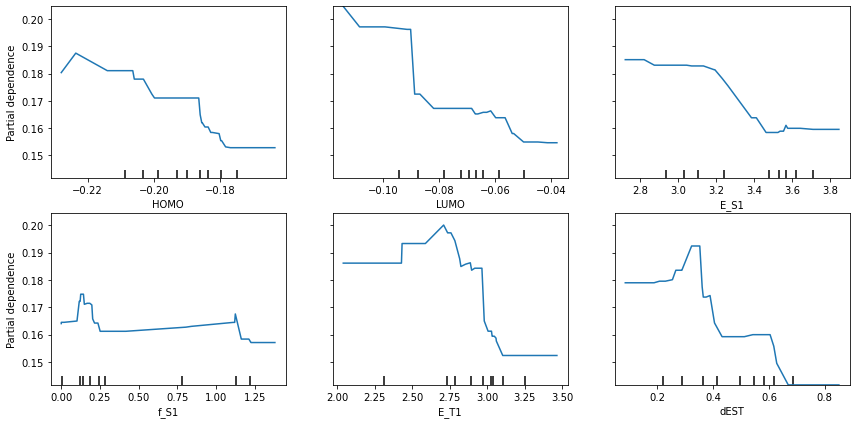

In [6]:
fig = plt.figure(figsize=(12,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
plot_partial_dependence(clf_best, X_train, (0,1,2,3,4,5), target='very_good', ax=ax)
fig.savefig("result/vg_DFT.pdf")

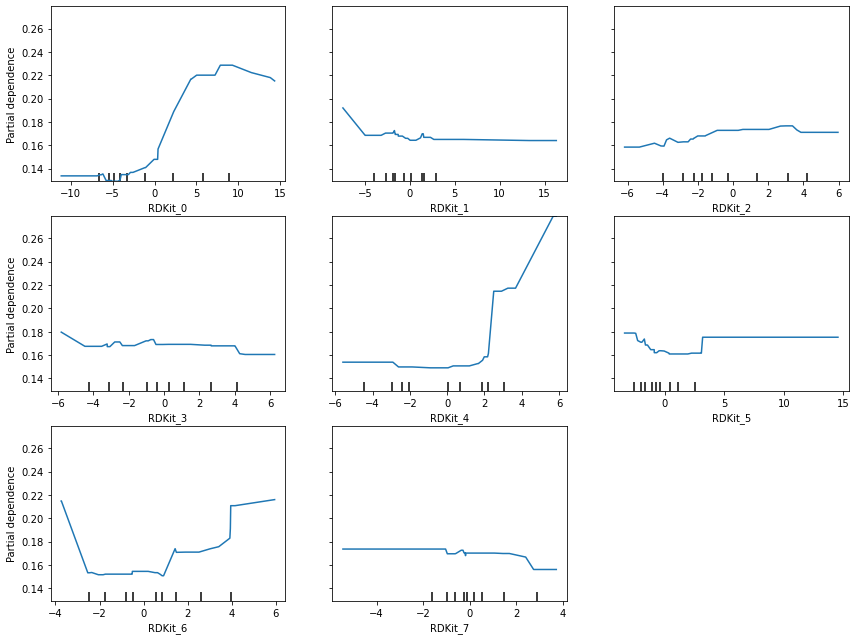

In [7]:
fig = plt.figure(figsize=(12,9), tight_layout=True)
ax = fig.add_subplot(1,1,1)
plot_partial_dependence(clf_best, X_train, (6,7,8,9,10,11,12,13), target='very_good', ax=ax)
fig.savefig("result/vg_RDKit.pdf")

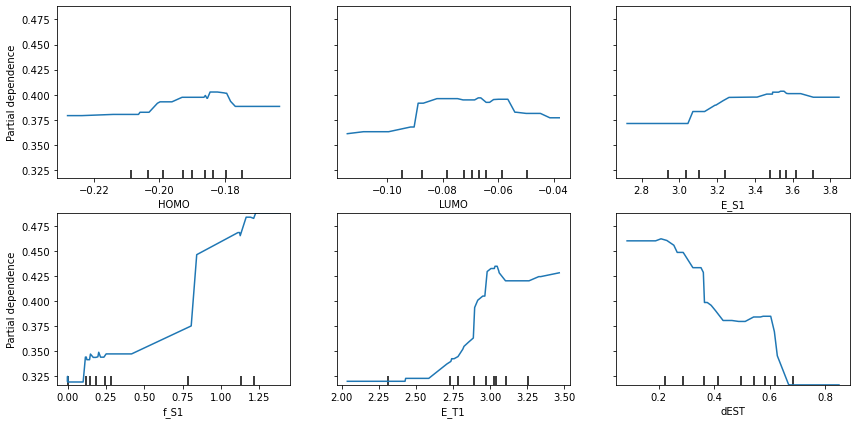

In [8]:
fig = plt.figure(figsize=(12,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
plot_partial_dependence(clf_best, X_train, (0,1,2,3,4,5), target='good', ax=ax)
fig.savefig("result/good_DFT.pdf")

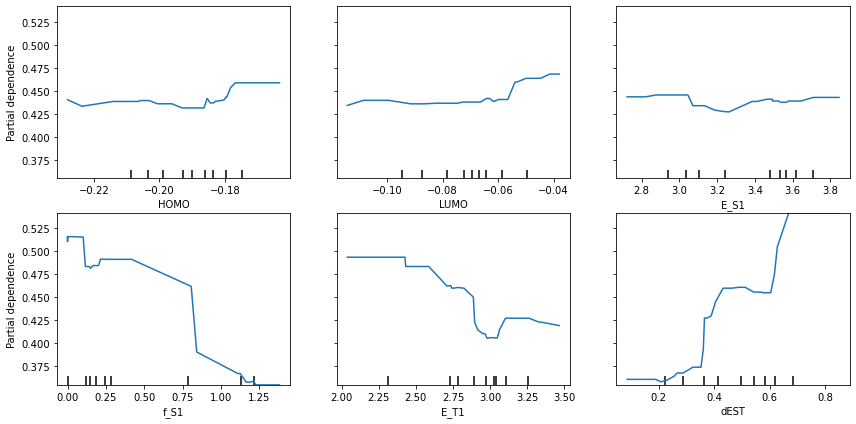

In [9]:
fig = plt.figure(figsize=(12,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
plot_partial_dependence(clf_best, X_train, (0,1,2,3,4,5), target='bad', ax=ax)
fig.savefig("result/bad_DFT.pdf")

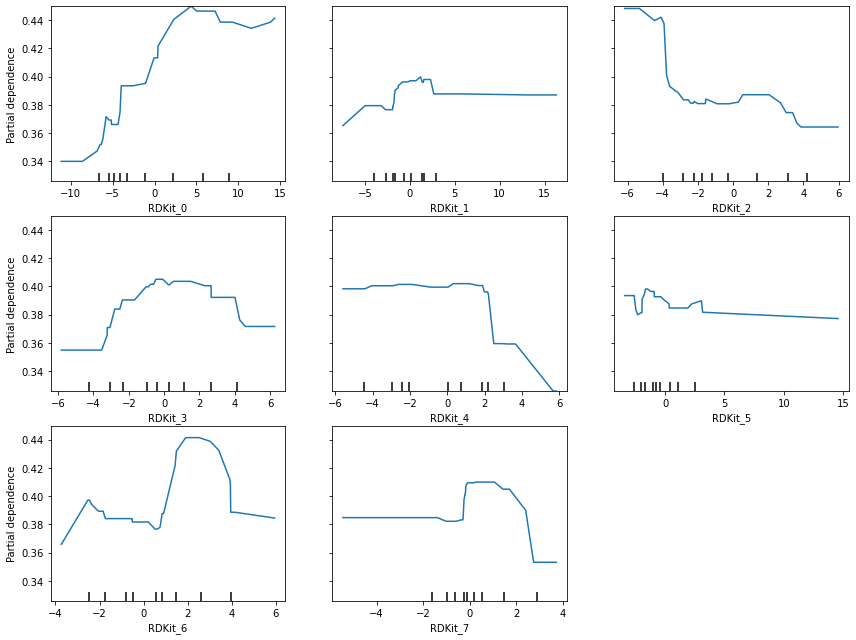

In [10]:
fig = plt.figure(figsize=(12,9), tight_layout=True)
ax = fig.add_subplot(1,1,1)
plot_partial_dependence(clf_best, X_train, (6,7,8,9,10,11,12,13), target='good', ax=ax)
fig.savefig("result/good_RDKit.pdf")

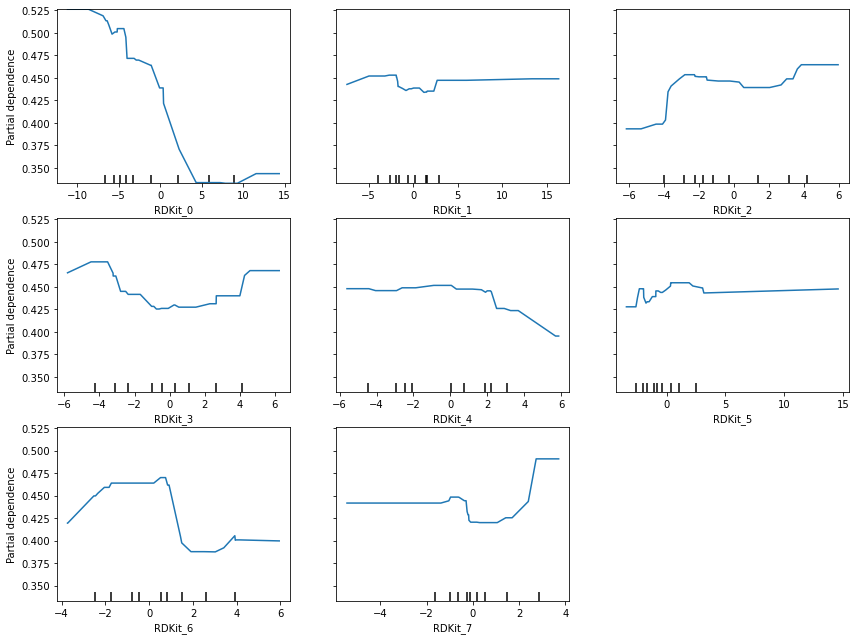

In [11]:
fig = plt.figure(figsize=(12,9), tight_layout=True)
ax = fig.add_subplot(1,1,1)
plot_partial_dependence(clf_best, X_train, (6,7,8,9,10,11,12,13), target='bad', ax=ax)
fig.savefig("result/bad_RDKit.pdf")